In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

from recommenders.utils.timer import Timer
from recommenders.datasets import movielens
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.neighbors import KNeighborsRegressor

c:\Users\USER\.conda\envs\recommenders-env\lib\site-packages\pandera\_pandas_deprecated.py:157: FutureWarning: Importing pandas-specific classes and functions from the
top-level pandera module will be **removed in a future version of pandera**.
If you're using pandera to validate pandas objects, we highly recommend updating
your import:

```
# old import
import pandera as pa

# new import
import pandera.pandas as pa
```

If you're using pandera to validate objects from other compatible libraries
like pyspark or polars, see the supported libraries section of the documentation
for more information on how to import pandera:

https://pandera.readthedocs.io/en/stable/supported_libraries.html

To disable this warning, set the environment variable:

```
export DISABLE_PANDERA_IMPORT_WARNING=True
```

  warnings.warn(_future_warning, FutureWarning)


In [2]:
df = movielens.load_pandas_df(
    size="100k",
    header=["userId", "movieId", "rating", "timestamp"]
)
df = df[["userId", "movieId", "rating"]]
df.head()

100%|██████████| 4.81k/4.81k [00:04<00:00, 1.15kKB/s]


,userId,movieId,rating
0,196,242,3.0
1,186,302,3.0
2,22,377,1.0
3,244,51,2.0
4,166,346,1.0


In [3]:
user_enc = LabelEncoder()
item_enc = LabelEncoder()
df["userId_enc"] = user_enc.fit_transform(df["userId"])
df["movieId_enc"] = item_enc.fit_transform(df["movieId"])

scaler = StandardScaler()
df[["userId_enc", "movieId_enc"]] = scaler.fit_transform(df[["userId_enc", "movieId_enc"]])

df.head()

,userId,movieId,rating,userId_enc,movieId_enc
0,196,242,3.0,-0.999519,-0.554812
1,186,302,3.0,-1.037026,-0.373432
2,22,377,1.0,-1.652150,-0.146707
3,244,51,2.0,-0.819482,-1.132206
4,166,346,1.0,-1.112041,-0.240420


In [4]:
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [5]:
X = df[["userId_enc", "movieId_enc"]]
y = df["rating"]

rmse_list = []
mae_list = []
mse_list = []

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=i
    )
    model = KNeighborsRegressor(n_neighbors=5, metric='cosine')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    
    mse_list.append(mse)
    rmse_list.append(rmse)
    mae_list.append(mae)
    
    print(f"Lan {i+1}: RMSE = {rmse:.4f} | MAE = {mae:.4f} | MSE = {mse:.4f}")

mean_rmse = np.mean(rmse_list)
mean_mae = np.mean(mae_list)
mean_mse = np.mean(mse_list)

print(f"\nTrung binh sau 10 lan:")
print(f"RMSE trung binh: {mean_rmse:.4f}")
print(f"MAE trung binh: {mean_mae:.4f}")
print(f"MSE trung binh: {mean_mse:.4f}")

Lan 1: RMSE = 1.2105 | MAE = 0.9748 | MSE = 1.4654
Lan 2: RMSE = 1.2052 | MAE = 0.9714 | MSE = 1.4526
Lan 3: RMSE = 1.2116 | MAE = 0.9746 | MSE = 1.4680
Lan 4: RMSE = 1.2073 | MAE = 0.9708 | MSE = 1.4575
Lan 5: RMSE = 1.2112 | MAE = 0.9769 | MSE = 1.4670
Lan 6: RMSE = 1.2120 | MAE = 0.9738 | MSE = 1.4688
Lan 7: RMSE = 1.2124 | MAE = 0.9764 | MSE = 1.4700
Lan 8: RMSE = 1.2056 | MAE = 0.9731 | MSE = 1.4535
Lan 9: RMSE = 1.2001 | MAE = 0.9626 | MSE = 1.4402
Lan 10: RMSE = 1.2164 | MAE = 0.9799 | MSE = 1.4796

Trung binh sau 10 lan:
RMSE trung binh: 1.2092
MAE trung binh: 0.9734
MSE trung binh: 1.4622


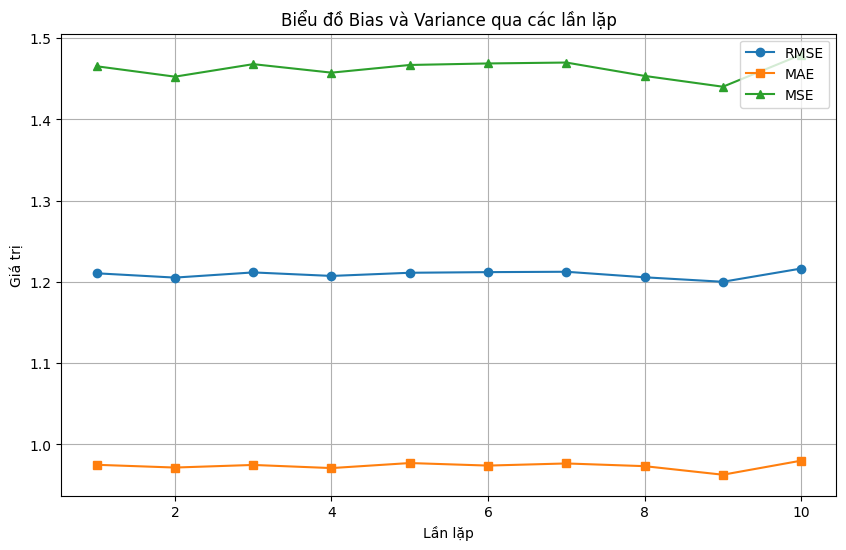

In [6]:
iterations = np.arange(1, 11)

plt.figure(figsize=(10, 6))
plt.plot(iterations, rmse_list, marker='o', label='RMSE')
plt.plot(iterations, mae_list, marker='s', label='MAE')
plt.plot(iterations, mse_list, marker='^', label='MSE')
plt.xlabel('Lần lặp')
plt.ylabel('Giá trị')
plt.title('Biểu đồ Bias và Variance qua các lần lặp')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
with open('knn_model.pkl', 'wb') as f:
    pickle.dump(model, f)

print("Luu mo hinh thanh cong")

Luu mo hinh thanh cong
